In [68]:
import nibabel as nib
import matplotlib.image as mping
import numpy as np
import os
from dipy.viz import regtools
import matplotlib.pyplot as plt


def visualize(img_path, namer, suffix_name):
    """
    img_path: str
    the path of input image

    namer:the object of Class NameResource
    to obtain the path of qa's save path

    suffix_name:str
    the name of save picture
    """
    img_nii = nib.load(img_path)
    img_arr = img_nii.get_data()
    x, y, z = img_arr.shape
    image_arr_1 = np.concatenate((img_arr[int(x/4),:,:],img_arr[int(x/2),:,:],img_arr[int(3*x/4),:,:]),axis=1)
    image_arr_2 = np.concatenate((img_arr[:,int(y/4),:],img_arr[:,int(y/2),:],img_arr[:,int(3*y/4),:]),axis=1)
    image_arr_3 = np.concatenate((img_arr[:,:,int(z/4)],img_arr[:,:,int(z/2)],img_arr[:,:,int(3*z/4)]),axis=1)
    image_arr = np.vstack((image_arr_1,image_arr_2,image_arr_3))

    os.chdir(namer.dirs['qa']['base'])
    if 'proproc' not in os.listdir():
        os.mkdir('proproc')
    namer.dirs['qa']['proproc'] = namer.dirs['qa']['base'] + '/proproc/'
    dir = namer.dirs['qa']['proproc']
    mping.imsave(dir+suffix_name, image_arr, cmap= 'gray')

def overlay(input_1, input_2, input_1_name, input_2_name, suffix_name, namer):
    '''
    input_1:str
    input_2:str
    input_1_name:str
    input_2_name:str
    suffix_name:str
    namer:the object of Class NameResource
    '''
    img_nii_1 = nib.load(input_1)
    img_nii_2 = nib.load(input_2)
    img_arr_1 = img_nii_1.get_data()
    img_arr_2 = img_nii_2.get_data()
    os.chdir(namer.dirs['qa']['base'])
    if 'proproc' not in os.listdir():
        os.mkdir('proproc')
    namer.dirs['qa']['proproc'] = namer.dirs['qa']['base'] + '/proproc/'
    regtools.overlay_slices(img_arr_1, img_arr_2, None, 0, input_1_name, input_2_name, namer.dirs['qa']['proproc']+'0_'+suffix_name)
    regtools.overlay_slices(img_arr_1, img_arr_2, None, 1, input_1_name, input_2_name, namer.dirs['qa']['proproc']+'1_'+suffix_name)
    regtools.overlay_slices(img_arr_1, img_arr_2, None, 2, input_1_name, input_2_name, namer.dirs['qa']['proproc']+'2_'+suffix_name)

In [69]:
def segment_t1w(t1w, basename, namer, opts=""):
    """Uses FSLs FAST to segment an anatomical image into GM, WM, and CSF probability maps.

    Parameters
    ----------
    t1w : str
        the path to the t1w image to be segmented
    basename : str
        the basename for outputs. Often it will be most convenient for this to be the dataset, followed by the subject,
        followed by the step of processing. Note that this anticipates a path as well;
        ie, /path/to/dataset_sub_nuis, with no extension.
    opts : str, optional
        additional options that can optionally be passed to fast. Desirable options might be -P, which will use
        prior probability maps if the input T1w MRI is in standard space, by default ""

    Returns
    -------
    dict
        dictionary of output files
    """

    # run FAST, with options -t for the image type and -n to
    # segment into CSF (pve_0), WM (pve_1), GM (pve_2)
    visualize(t1w, namer, 'brain.png')
    cmd = f'fast -t 1 {opts} -n 3 -o {basename} {t1w}'
    os.system(cmd)
    out = {}  # the outputs
    out["wm_prob"] = f'{basename}_pve_2.nii.gz'
    out["gm_prob"] = f'{basename}_pve_1.nii.gz'
    out["csf_prob"] = f'{basename}_pve_0.nii.gz'
    visualize(out['wm_prob'], namer, 'wm_prob.png')
    overlay(t1w, out["wm_prob"], 't1w_brain', 'wm_prob', 't1w_brain_wm_prob.png', namer)
    visualize(out['gm_prob'], namer, 'gm_prob.png')
    overlay(t1w, out["gm_prob"], 't1w_brain', 'gm_prob', 't1w_brain_gm_prob.png', namer)
    visualize(out['csf_prob'], namer, 'csf_prob.png')
    overlay(t1w, out["csf_prob"], 't1w_brain', 'csf_prob', 't1w_brain_csf_prob.png', namer)
    return out


In [113]:
from pathlib import Path
from PIL import Image
import scipy
import cv2
from PIL import Image, ImageDraw, ImageFont

# a = nib.load('d:/Downloads/neurodatadesign/output_data/flirt/sub-0025864/ses-1/anat/preproc/t1w_seg_pve_0.nii.gz')
# b = nib.load('d:/Downloads/neurodatadesign/output_data/flirt/sub-0025864/ses-1/anat/preproc/t1w_seg_pve_1.nii.gz')
# c = nib.load('d:/Downloads/neurodatadesign/output_data/flirt/sub-0025864/ses-1/anat/preproc/t1w_seg_pve_2.nii.gz')
# a_arr = a.get_data()
# b_arr = b.get_data()
# c_arr = c.get_data()
# a_im = Image.fromarray(a_arr[46]).convert('RGB')
# b_im = Image.fromarray(b_arr[46]).convert('RGB')
# c_im = Image.fromarray(c_arr[46]).convert('RGB')
# a_img = Image.open(a_im)
# b_img = Image.open(b_im)
# c_img = Image.open(c_im)
# # a_im.show()
# print(a_im.mode)
# r1,g1,b1=a_img.split()
# r2,g2,b2=b_img.split()
# r3,g3,b3=c_img.split()
# pic = Image.merge('RGB', (r1, g2, b3))
# pic.show()
# plt.imshow(d[46])


lena_wm = Image.open('D:/Downloads/neurodatadesign/output_data/flirt/sub-0025864/ses-1/qa/proproc/wm_prob.png')
lena_gm = Image.open('D:/Downloads/neurodatadesign/output_data/flirt/sub-0025864/ses-1/qa/proproc/gm_prob.png')
lena_csf = Image.open('D:/Downloads/neurodatadesign/output_data/flirt/sub-0025864/ses-1/qa/proproc/csf_prob.png')
# print(lena_wm.mode)
# print(lena_gm.mode)
# print(lena_csf.mode)
# lena_wm.show()
gray_wm = lena_wm.convert('RGB')
gray_gm = lena_gm.convert('RGB')
gray_csf = lena_csf.convert('RGB')
r1,g1,b1=gray_wm.split()
r2,g2,b2=gray_gm.split()
r3,g3,b3=gray_csf.split()
pic = Image.merge('RGB', (r1, g2, b3))
# pic.show()
# imgs = pic
draw = ImageDraw.Draw(pic)
w, h = pic.size
fillcolor = '#ffffff'
draw.text((w/20, h/6), 'x', fill=fillcolor)
draw.text((w/20, h/2), 'y', fill=fillcolor)
draw.text((w/20, 5*h/6), 'z', fill=fillcolor)

pic.show('segment')


# def _tile_plot(imgs, titles, **kwargs):
#     """
#     Helper function
#     """
#     # Create a new figure and plot the three images
#     plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=1, hspace=1)
#     fig, ax = plt.subplots(3, 3)
#     k = 0
#     for i in [0, 1, 2]:
#         ax[0,0].set_ylabel('Sagittal(YZ fixed)')
#         ax[1,0].set_ylabel('Coronal(XZ fixed)')
#         ax[2,0].set_ylabel('Axial(XY fixed)')
#         for j in [0, 1, 2]:
#             #ax[i][j].set_axis_off()
#             ax[i][j].imshow(imgs[k], **kwargs)
#             ax[i][j].set_title(titles[k])
#             k = k+1
#     fig.tight_layout()
#     return fig
# fig = _tile_plot(imgs, titles)
# fig.show()

# print(lena.mode)
# print(lena.getpixel((0,0)))
# lena_1 = lena.convert("1")
# print(lena_1.mode)
# lena_1.show()

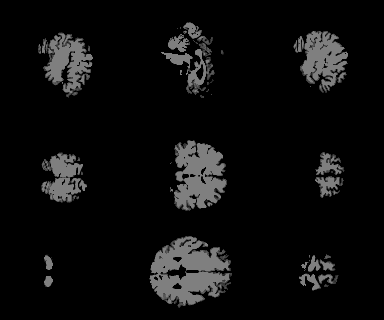

In [98]:
Image.blend(lena_wm,lena_gm, 0.5)

(320, 384)
RGB
<class 'PIL.Image.Image'>


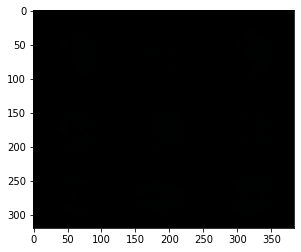

In [73]:
import matplotlib.image as mping
m = 'd:/Downloads/neurodatadesign/output_data/flirt_2/sub-0025864/ses-1/anat/preproc/t1w_seg_pve_0.nii.gz'
n = 'd:/Downloads/neurodatadesign/output_data/flirt_2/sub-0025864/ses-1/anat/preproc/t1w_seg_pve_1.nii.gz'
l = 'd:/Downloads/neurodatadesign/output_data/flirt_2/sub-0025864/ses-1/anat/preproc/t1w_seg_pve_2.nii.gz'
def overlay_viz(wm_input, gm_input, csf_input):
    wm_img_arr = slices2merge(wm_input)
    gm_img_arr = slices2merge(gm_input)
    csf_img_arr = slices2merge(csf_input)
    print(wm_img_arr.shape)
    wm_RGB = Image.fromarray(wm_img_arr).convert('RGB')
    print(wm_RGB.mode)
    print(type(wm_RGB))
    wm_RGB.show()
    gm_RGB = Image.fromarray(gm_img_arr).convert('RGB')
    csf_RGB = Image.fromarray(csf_img_arr).convert('RGB')
    r1, g1, b1 = wm_RGB.split()
    r2, g2, b2 = gm_RGB.split()
    r3, g2, b3 = csf_RGB.split()
    pic = Image.merge('RGB', (r1, g2, b3))
    mping.imsave('e:/noooo.png', pic, cmap= 'gray')
    plt.savefig(r'F:\JHU\ndd\dataset\output1\sub-0025864\ses-1\qa\result.png', dpi=1990)
    plt.imshow(pic)
    
    
import nibabel as nib
from PIL import Image
import numpy as np 


def slices2merge(input):
    '''

    return: np_array 3D
    Put together nine image into an 3D array
    '''
    input_nii = nib.load(input)
    input_arr = input_nii.get_data()
    x, y, z = input_arr.shape
    input_img_x = np.concatenate((input_arr[int(x/2)-10,:,:],input_arr[int(x/2),:,:],input_arr[int(x/2)+10,:,:]), axis=1)
    input_img_y = np.concatenate((input_arr[:,int(y/2)-10,:],input_arr[:,int(y/2),:],input_arr[:,int(y/2)+10,:]), axis=1)
    input_img_z = np.concatenate((input_arr[:,:,int(z/2)-10],input_arr[:,:,int(z/2)],input_arr[:,:,int(z/2)+10]), axis=1)
    output = np.vstack((input_img_x, input_img_y, input_img_z))
    return output

overlay_viz(m,n,l)

In [ ]:
import nibabel as nib
from PIL import Image
import numpy as np
import matplotlib.image as mping
import os


def slices2merge(input):
    '''

    return: np_array 3D
    Put together nine image into an 3D array
    '''
    input_nii = nib.load(input)
    input_arr = input_nii.get_data()
    x, y, z = input_arr.shape
    input_img_x = np.concatenate(input_arr[int(x/2)-10,:,:],input_arr[int(x/2),:,:],input_arr[int(x/2)+10,:,:], axis=1)
    input_img_y = np.concatenate(input_arr[:,int(y/2)-10,:],input_arr[:,int(y/2),:],input_arr[:,int(y/2)+10,:], axis=1)
    input_img_z = np.concatenate(input_arr[:,:,int(z/2)-10],input_arr[:,:,int(z/2)],input_arr[:,:,int(z/2)+10], axis=1)
    output = np.vstack((input_img_x, input_img_y, input_img_z))
    return output

def (array, RGBimg):
    '''
    this function is used to output a 'RGB' image when input a nifiti str
    
    input: str
    the path of the nifiti image

    output: .png image
    the RGB image
    '''
    
    RGBimg = Image.fromarray(array)
    return RGBimg

def overlay_viz(wm_input, gm_input, csf_input):
    wm_img_arr = slices2merge(wm_input)
    gm_img_arr = slices2merge(gm_input)
    csf_img_arr = slices2merge(csf_input)
    wm_GRB = Image.fromarray(wm_img_arr).convert('RGB')
    gm_RGB = Image.fromarray(gm_img_arr).convert('RGB')
    csf_RGB = Image.fromarray(csf_img_arr).convert('RGB')
    r1, g1, b1 = wm_GRB.split()
    r2, g2, b2 = gm_GRB.split()
    r3, g2, b3 = csf_GRB.split()
    pic = Image.merge('RGB', (r1, g2, b3))

def visualize(img_path, namer, suffix_name):
    """
    img_path: str
    the path of input image

    namer:the object of Class NameResource
    to obtain the path of qa's save path

    suffix_name:str
    the name of save picture
    """
    img_nii = nib.load(img_path)
    img_arr = img_nii.get_data()
    x, y, z = img_arr.shape
    image_arr_1 = np.concatenate((img_arr[int(x/4),:,:],img_arr[int(x/2),:,:],img_arr[int(3*x/4),:,:]),axis=1)
    image_arr_2 = np.concatenate((img_arr[:,int(y/4),:],img_arr[:,int(y/2),:],img_arr[:,int(3*y/4),:]),axis=1)
    image_arr_3 = np.concatenate((img_arr[:,:,int(z/4)],img_arr[:,:,int(z/2)],img_arr[:,:,int(3*z/4)]),axis=1)
    image_arr = np.vstack((image_arr_1,image_arr_2,image_arr_3))

    os.chdir(namer.dirs['qa']['base'])
    if 'proproc' not in os.listdir():
        os.mkdir('proproc')
    namer.dirs['qa']['proproc'] = namer.dirs['qa']['base'] + '/proproc/'
    dir = namer.dirs['qa']['proproc']
    mping.imsave(dir+suffix_name, image_arr, cmap= 'gray')

def overlay(input_1, input_2, input_1_name, input_2_name, suffix_name, namer):
    '''
    input_1:str
    input_2:str
    input_1_name:str
    input_2_name:str
    suffix_name:str
    namer:the object of Class NameResource
    '''
    img_nii_1 = nib.load(input_1)
    img_nii_2 = nib.load(input_2)
    img_arr_1 = img_nii_1.get_data()
    img_arr_2 = img_nii_2.get_data()
    os.chdir(namer.dirs['qa']['base'])
    if 'proproc' not in os.listdir():
        os.mkdir('proproc')
    namer.dirs['qa']['proproc'] = namer.dirs['qa']['base'] + '/proproc/'
    regtools.overlay_slices(img_arr_1, img_arr_2, None, 0, input_1_name, input_2_name, namer.dirs['qa']['proproc']+'0_'+suffix_name)
    regtools.overlay_slices(img_arr_1, img_arr_2, None, 1, input_1_name, input_2_name, namer.dirs['qa']['proproc']+'1_'+suffix_name)
    regtools.overlay_slices(img_arr_1, img_arr_2, None, 2, input_1_name, input_2_name, namer.dirs['qa']['proproc']+'2_'+suffix_name)

